# When to replace your machine?

Your (somewhat strange looking) machine's annual maitenance cost $c(x)$ evolves with its level of wear $x$. At some point, it becomes cheaper to by a new one, for a fixed price $C$. 
But the evolution of the level of wear is random: from one year to the next, it increases by a random amount modelled by an exponential distribution of parameter $\lambda$. 

In [80]:
import numpy as np
import matplotlib.pyplot as plt #%matplotlib inline

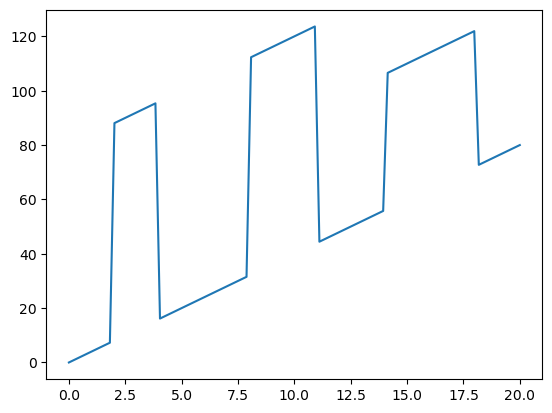

In [85]:
gamma = 0.9 # discount factor
replacementCost = 150
def maintenanceCost(x):
    y = 4 * x
    if 2 <= x <= 4 or 8 <= x <= 11 :
        y += 80
    elif 14 <= x <= 18:
        y += 50
    return y

meanWearIncrease = 1
randomWearIncrease = lambda: np.random.exponential(1)

actions = ["Keep", "Replace"]

xx = np.linspace(0, 20, 100)
plt.plot(xx, [maintenanceCost(x) for x in xx]);

In [88]:
randomPolicy = lambda x: np.random.choice(["Keep", "Replace"])

def evaluatePolicy(pi):
    x = 0
    totalCost = 0
    discount = 1
    T = int(4/(1-gamma))
    for t in range(T):
        a = pi(x)
        totalCost += maintenanceCost(x) if a == "Keep" else replacementCost
        x = (x if a == "Keep" else 0.) + randomWearIncrease() 
        discount *= gamma
    return(totalCost)

evaluatePolicy(randomPolicy)

3171.0831454026134

# Approximate planning using a simulator

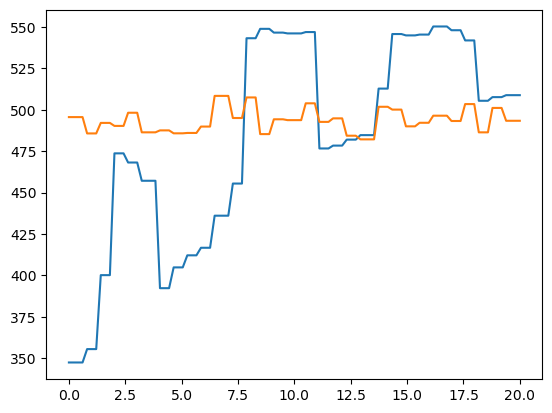

In [95]:
d = 31

# polynomial basis ??
basis = [lambda x, k=k: x**k for k in range(d)] 

# piecewise constant function
bins = np.linspace(0, 20, d+1)
bins[-1] = np.inf
basis = [lambda x, k=k: float(bins[k] <= x <= bins[k+1]) for k in range(d)] 

# Fourier basis
#basis = [lambda x, k=k: np.cos(k*x/20*2*np.pi) for k in range(d//2)]
#basis = basis + [lambda x, k=k: np.sin(k*x/20 * 2 * np.pi) for k in range(1, d-len(basis)+1)]

coeffs = np.zeros(2*d)

def Qfunction(x, a):
    if a == "Keep":
        return sum([coeffs[k] * basis[k](x) for k in range(d)])
    else:
        return sum([coeffs[d+k] * basis[k](x) for k in range(d)])

for j in range(20):
    X = []
    Y = []
    for k in range(1000):
        x = np.random.uniform(0, 20)
        a = np.random.choice(["Keep", "Replace"])
        c = maintenanceCost(x) if a == "Keep" else replacementCost
        newWear = (x if a == "Keep" else 0.) + randomWearIncrease() 
        if a == "Keep":
            X.append([f(x) for f in basis] + [0 for f in basis])
        else:
            X.append([0 for f in basis] + [f(x) for f in basis])
        z = c + gamma * min(Qfunction(newWear, "Keep"), Qfunction(newWear, "Replace"))
        Y.append(z)
    
    coeffs = np.linalg.lstsq(X, Y, rcond=None)[0]


plt.plot(xx, [Qfunction(x, "Keep") for x in xx])
plt.plot(xx, [Qfunction(x, "Replace") for x in xx])

In [96]:
policy = lambda x: "Keep" if Qfunction(x, "Keep") <= Qfunction(x, "Replace") else "Replace"

evaluatePolicy(policy)

2021.7991281396571

## Evaluation: 

Upload into folder https://plmbox.math.cnrs.fr/u/d/2666573c3a714a2bbdce/ a file <Yourname.ipynb> adding 

  - a discretization of the above MDP with a planning algorithm
  
  - a better basis for the Q-value function, giving a better approximation of the Q-function (compare with the discretized solution)
  
  - a fitted Q-learning algorithm that converges

The computational cost of your algorithms will be taken into account.